# SPO2IDA

##Load capacity curves

In order to use this methodology, it is necessary to provide one (or a group) of capacity curves, defined according to the format established on the [RMTK manual](../../../../../rmtk-docs.pdf). Please provide the location of the folder containing this input using the parameter input_folder.

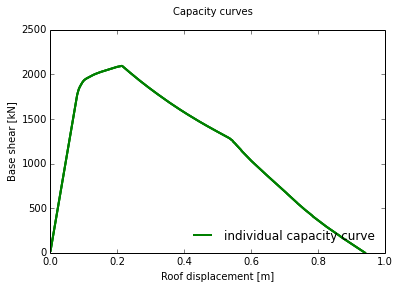

In [1]:
from rmtk.vulnerability.common import utils
%matplotlib inline 

input_type = 'Vb-dfloor'

capacity_curves_file = '../../../../../../rmtk_data/capacity_curves_Vb-dfloor.csv'

input_spectrum = '../../../../../../rmtk_data/FEMAP965spectrum.txt'
montecarlo_samples = 25

capacity_curves = utils.read_capacity_curves(capacity_curves_file)
utils.plot_capacity_curves(capacity_curves)
Sa_ratios = utils.get_spectral_ratios(capacity_curves,input_spectrum)


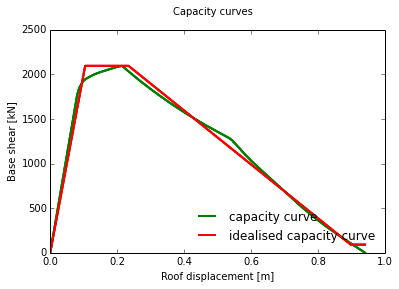

In [2]:
idealised_type = 'quadrilinear'

idealised_capacity = utils.idealisation(idealised_type, capacity_curves)
utils.plot_idealised_capacity(idealised_capacity, capacity_curves, idealised_type)

In [3]:
damage_model_file = '../../../../../../rmtk_data/damage_model_ISD.csv'
damage_model = utils.read_damage_model(damage_model_file)
print damage_model

{'dispersion': [[0.05, 0.05, 0.05, 0.05], [0.05, 0.05, 0.05, 0.05]], 'type_criteria': 'interstorey drift', 'distribution': ['normal', 'normal', 'normal', 'normal'], 'median': [[0.005, 0.01, 0.02, 0.05], [0.005, 0.01, 0.02, 0.05]], 'damage_states': ['Slight', 'Moderate', 'Extensive', 'Collapse']}


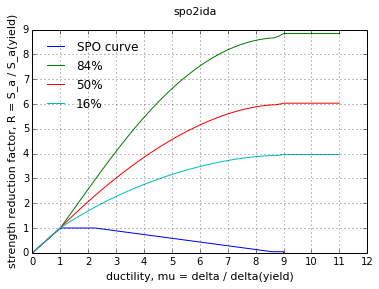

mu(LS) =  [ 1.01944018  2.02678158  4.53093238  8.39693424]
median IM =  [ 0.12755145  0.2621123   0.53086121  0.7443251 ]
total dispersion =  [ 0.05231756  0.21656963  0.35134217  0.38731461]


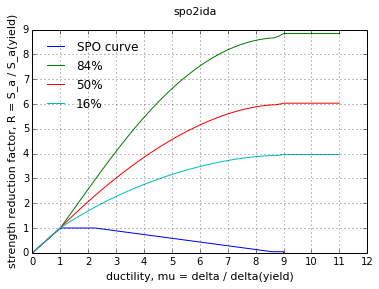

mu(LS) =  [ 1.01944018  2.02678158  4.53093238  8.39693424]
median IM =  [ 0.12755145  0.2621123   0.53086121  0.7443251 ]
total dispersion =  [ 0.05231756  0.21656963  0.35134217  0.38731461]


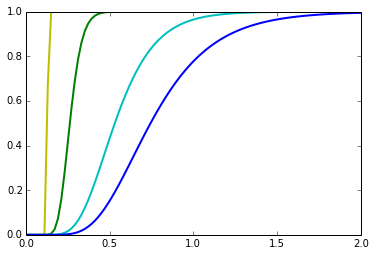

In [4]:
from rmtk.vulnerability.derivation_fragility.R_mu_T_dispersion.SPO2IDA import SPO2IDA_procedure 
ida_plotflag = 1

fragility_model = SPO2IDA_procedure.calculate_fragility(capacity_curves, idealised_capacity, damage_model, montecarlo_samples, Sa_ratios, ida_plotflag)
utils.plot_fragility(fragility_model,0.01,2)